#### Eleonora Bellasio (15650A)
# <span style="color:orangered">Laboratorio di Simulazione Numerica: Esercitazione 9

#### Traveling Salesman Problem (TSP)
Il Traveling Salesman Problem (TSP) è un problema che consiste in un commesso viaggiatore con un set di $N$ città e relative posizioni $\vec{c}_i$. Il venditore **deve visitare tutte le città una sola volta e ritornare alla città di partenza**. L'obiettivo dell'esercizio è quello di minimizzare la lunghezza totale del percorso.

Si considera la sequenza ordinata di città, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, che va dalla prima all'$n^{esima}$ città. Si è scelto di minimizzare la funzione di costo seguente:
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

con $\vec{x}_{N+1}=\vec{x}_1$ una particolare permutazione, P, della sequenza ordinata di città $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$ che minimizza la funzione. 

Si è scelto di esprimere il percorso tramite un vettore 1D, i cui elementi sono interi che rappresentano le città nell'ordine in cui vengono visitate.

### <span style="color:royalblue">Esercizio 09.1

L'obiettivo dell'esercizio è risolvere il TSP con un **Algoritmo Genetico (GA)**, ovvero un algoritmo che fa evolvere una popolazione di percorsi per un certo numero di generazioni attraverso metodi di selezione efficienti. Alcuni dei metodi più importanti inclusi nel codice sono:
- $\underline{Check \ passed}:$ per verificare che ogni individuo rispetti i vincoli, ovvero la prima città deve essere fissata e ogni città deve essere visitata una sola volta;
- $\underline{Permutazione:}$ mutazione che scambia due città di un cromosoma (percorso) scelte in modo casuale;
- $\underline{Shift:}$ mutazione che sposta di n posizioni m città consecutive;
- $\underline{Scambio:}$ mutazione che scambia due blocchi di m città consecutive;
- $\underline{Inversione:}$ mutazione che inverte l'ordine in cui compaiono un certo numero di città in un cromosoma;
- $\underline{Crossover:}$ metodo utilizzato per creare due figli a partire da due genitori. Si sceglie un punto di taglio e prima di questo punto i cromosomi di ciascuno rimangono invariati. Dopo di esso, invece, si riportano le città nell'ordine in cui compaiono nell'altro genitore.
- $\underline{Operatre \ di \ selezione:}$ seleziona i migliori individui per creare la generazione successiva secondo la regola $j= int(M \times r^p)+1$ (dove $r$ è un numero casuale uniforme $r\in[0,1)$ e $p$ un certo esponente. 

Si dispongono le città su una circonferenza centrata in zero e di raggio $r=1$ e all'interno di un quadrato di lato $(-1, 1)$ e, per lo svolgimento dell'esercizio, si impostano i seguenti parametri:
- individui per ciascuna generazione: $ I = 200$
- numero di generazioni: $ N_{gen} = 300$
- probabilità di mutazione: $p^{(i)}_m = 10 \%$,
- probabilità di crossover: $p^{(i)}_c = 70 \%$,
- selettore del cromosoma: $p=2.1$

Il grafico rappresenta l'andamento di $L^{2}$ del migliore percorso in funzione della generazione.

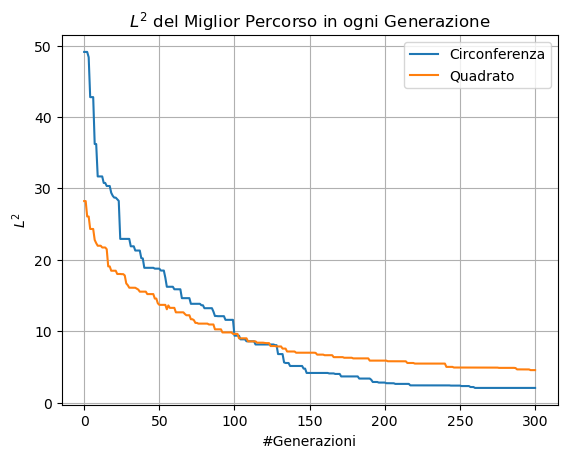

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os,sys
import pandas as pd

dinp = "09.1/OUTPUT/"
finp = dinp + "popolazione_C.dat"
finp1 = dinp + "popolazione_Q.dat"

if not os.path.isfile(finp):
    sys.exit( "file does not exist: " + finp )
if not os.path.isfile(finp1):
    sys.exit( "file does not exist: " + finp1 )

df_pop_C = pd.read_csv(finp, sep='\\s+', comment='#', names=['GENERAZIONE:','INDIVIDUO:','FITNESS:'])
df_pop_Q = pd.read_csv(finp1, sep='\\s+', comment='#', names=['GENERAZIONE:','INDIVIDUO:','FITNESS:'])

df_best_C = df_pop_C[df_pop_C['INDIVIDUO:']==1]#scelgo i primi individui di ogni generazione
df_best_Q = df_pop_Q[df_pop_Q['INDIVIDUO:']==1]#che sono quelli migliori
#print(df_best_Q.head())
#print(df_best_Q.columns)

plt.figure()
plt.plot(df_best_C['GENERAZIONE:'], df_best_C['FITNESS:'], label = 'Circonferenza')
plt.plot(df_best_Q['GENERAZIONE:'], df_best_Q['FITNESS:'], label = 'Quadrato')
plt.xlabel('#Generazioni')
plt.ylabel(r'$L^{2}$')
plt.title(r'$L^{2}$ del Miglior Percorso in ogni Generazione')
plt.grid(True)

plt.legend()
plt.show()


Si ottiene la media dei migliori $100$ percorsi (metà dei percorsi totali) per ciascuna generazione e si mostra l'andamento di $\langle L^{(2)}\rangle$ in funzione del numero di generazioni.

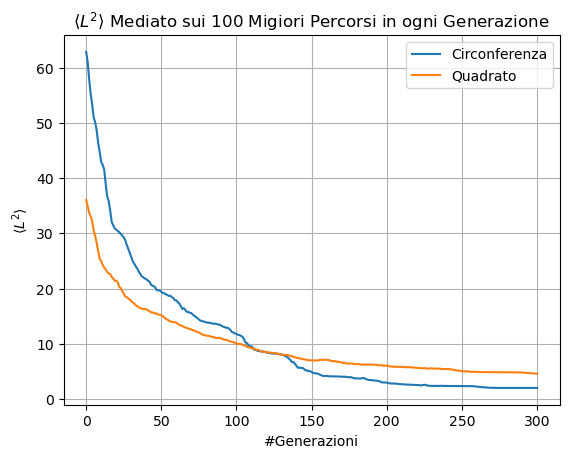

In [5]:
media_C = []
media_Q = []

# Per Circonferenza
df_100_C = df_pop_C[df_pop_C['INDIVIDUO:'] <= 100]
media_C = df_100_C.groupby('GENERAZIONE:')['FITNESS:'].mean().values

# Per Quadrato
df_100_Q = df_pop_Q[df_pop_Q['INDIVIDUO:'] <= 100]
media_Q = df_100_Q.groupby('GENERAZIONE:')['FITNESS:'].mean().values

plt.plot(df_pop_C['GENERAZIONE:'].unique(), media_C, label='Circonferenza')
plt.plot(df_pop_Q['GENERAZIONE:'].unique(), media_Q, label='Quadrato')
plt.xlabel('#Generazioni')
plt.ylabel(r'$\langle L^{2} \rangle$')
plt.title(r'$\langle L^{2} \rangle$ Mediato sui 100 Migiori Percorsi in ogni Generazione')
plt.grid(True)

plt.legend()
plt.show()

Le funzioni costo rappresentate, sia per la circonferenza sia per il quadrato, mostrano una convergenza piuttosto veloce al percorso migliore.

Si rappresentano i migliori percorsi ottenuti a fine simulazione sulla circonferenza e sul quadrato

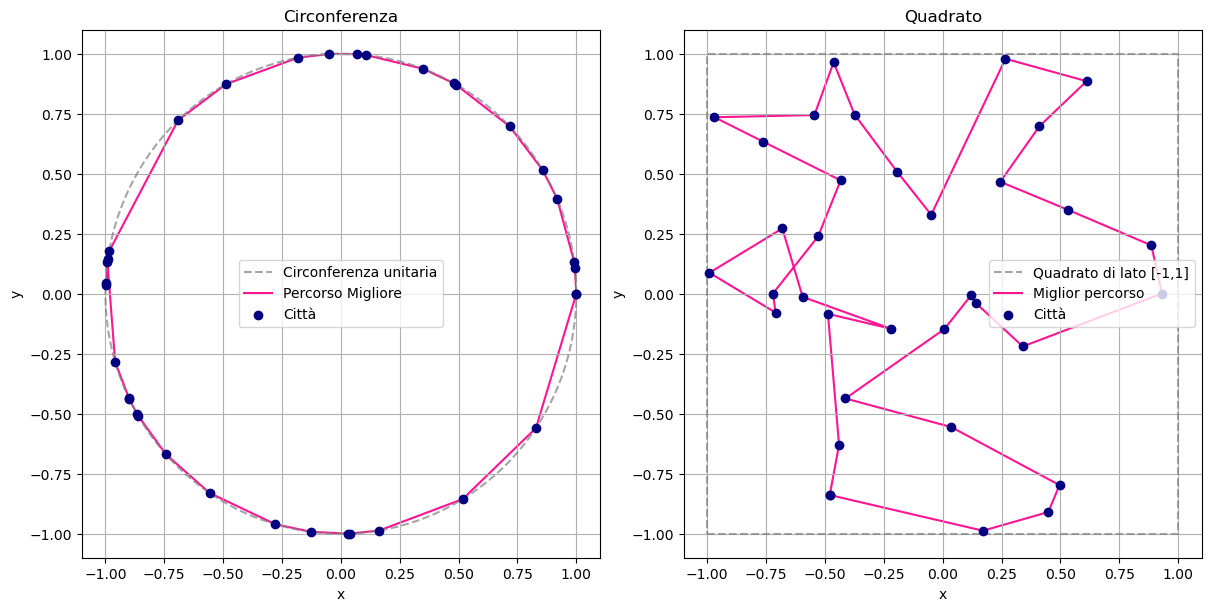

In [6]:
fig, spl = plt.subplots(1, 2, figsize=(12,6), layout = 'constrained') #due grafici affiancati

#Carico la posizione delle città sul cerchio e sul quadrato
finp2 = dinp + "citta_C.dat"
citta_C = np.loadtxt(finp2, skiprows=1, usecols=(1,2)) #salto la prima riga e leggo solo la seconda e la terza colonna
finp3 = dinp + "citta_Q.dat"
citta_Q = np.loadtxt(finp3, skiprows=1, usecols=(1,2))

# Leggi la sequenza del percorso migliore
with open('09.1/OUTPUT/migliore_C.dat') as f:
    lines = f.readlines()
    # Trova la riga con la sequenza delle città (adatta se necessario)
    for line in lines:
        if line.strip() and not line.startswith('#'):  #esegue solo se la riga non è vuota e non è un commento
            percorso = [int(i)-1 for i in line.split()] #Estrae una lista di interi da una riga, convertendoli in indici zero-based, pronti per essere usati in array Python.

#Visito le città nel giusto ordine
ordine_citta = citta_C[percorso]
ordine_citta = np.vstack([ordine_citta, ordine_citta[0]])  #"impilo" la prima dopo l'ultima e chiudo il percorso

theta = np.linspace(0,2*np.pi, 300)
spl[0].plot(np.cos(theta), np.sin(theta), color ='gray', alpha = 0.7, linestyle = '--', label = 'Circonferenza unitaria')
spl[0].plot(ordine_citta[:,0], ordine_citta[:,1], linestyle='-', color = 'deeppink', zorder = 1, label = 'Percorso Migliore')
spl[0].scatter(ordine_citta[:,0], ordine_citta[:,1], color='navy', marker='o', zorder = 2, label = 'Città') #per grafico a dispersione: città come pallini
spl[0].set_title('Circonferenza')
spl[0].set_xlabel('x')
spl[0].set_ylabel('y')
spl[0].legend()
spl[0].grid(True)

# Leggi la sequenza del percorso migliore
with open('09.1/OUTPUT/migliore_Q.dat') as f:
    lines = f.readlines()
    # Trova la riga con la sequenza delle città (adatta se necessario)
    for line in lines:
        if line.strip() and not line.startswith('#'):  #esegue solo se la riga non è vuota e non è un commento
            percorso = [int(i)-1 for i in line.split()] #Estrae una lista di interi da una riga, convertendoli in indici zero-based, pronti per essere usati in array Python.

#Visito le città nel giusto ordine
ordine_citta = citta_Q[percorso]
ordine_citta = np.vstack([ordine_citta, ordine_citta[0]])  #"impilo" la prima dopo l'ultima e chiudo il percorso

square_x = [-1, 1, 1, -1, -1]
square_y = [-1, -1, 1, 1, -1]
spl[1].plot(square_x, square_y, color ='gray', alpha = 0.7, linestyle = '--', label = 'Quadrato di lato [-1,1]')
spl[1].plot(ordine_citta[:,0], ordine_citta[:,1], linestyle='-', color = 'deeppink', zorder = 1, label = 'Miglior percorso')
spl[1].scatter(ordine_citta[:,0], ordine_citta[:,1], color='navy', marker='o', zorder = 2, label = 'Città') #per grafico a dispersione: città come pallini
spl[1].set_title('Quadrato')
spl[1].set_xlabel('x')
spl[1].set_ylabel('y')
spl[1].legend()
spl[1].grid(True)

plt.show()


Dai risultati ottenuti si puo notare che sulla circonferenza si arriva ad avere il percorso migliore con le città visitate nell'ordine. All'interno del quadrato, invece, il percorso rappresentato non è il migliore possibile.